# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv("craftcans.csv", na_values=[0])
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


In [3]:
#display all rows of any dfs in this notebook
#pd.set_option('display.max_rows', None)

#display all columns of any dfs in this notebook
#pd.set_option('display.max_columns', None)

In [4]:
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.30%,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.00%,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85


## How many rows do you have in the data? What are the column types?

In [5]:
df.shape

(2416, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Beer      2416 non-null   object
 1   Brewery   2410 non-null   object
 2   Location  2410 non-null   object
 3   Style     2405 non-null   object
 4   Size      2410 non-null   object
 5   ABV       2348 non-null   object
 6   IBUs      2410 non-null   object
dtypes: object(7)
memory usage: 132.3+ KB


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [7]:
df.groupby('Brewery')['Beer'].nunique().sort_values(ascending=False).head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           41
Sun King Brewing Company      38
Cigar City Brewing Company    24
Sixpoint Craft Ales           24
Great Crescent Brewery        20
21st Amendment Brewery        19
SanTan Brewing Company        19
Upslope Brewing Company       18
Great River Brewery           18
Name: Beer, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [8]:
df.ABV.value_counts(dropna=False).head(1)

ABV
5.00%    215
Name: count, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [9]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

In [10]:
df['ABV'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2416 entries, 0 to 2415
Series name: ABV
Non-Null Count  Dtype 
--------------  ----- 
2348 non-null   object
dtypes: object(1)
memory usage: 19.0+ KB


### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [11]:
df['ABV'] = df['ABV'].str.replace("%", "").astype(float)
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.3,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.0,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [12]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

<Axes: >

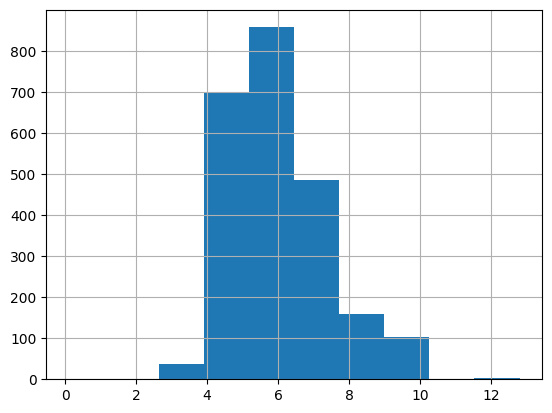

In [13]:
df['ABV'].hist()

In [14]:
df['ABV'].mean()

5.977342419080068

In [15]:
df['ABV'].median()

5.6

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [16]:
df['ABV'].isnull().sum()

68

In [17]:
df['ABV'].isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [18]:
df.groupby('Location')['Beer'].nunique().sort_values(ascending=False).head(10)

Location
Grand Rapids, MI     66
Chicago, IL          52
Indianapolis, IN     43
Boulder, CO          41
Portland, OR         41
Denver, CO           40
San Diego, CA        38
Brooklyn, NY         37
Seattle, WA          35
San Francisco, CA    31
Name: Beer, dtype: int64

## List all of the beer from Brooklyn, NY

In [19]:
df[df['Location'].str.contains("Brooklyn, NY", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most different cans of beer?

In [20]:
df[df['Location']== 'Brooklyn, NY'].groupby('Brewery')['Beer'].nunique().sort_values(ascending=False).head(1)

Brewery
Sixpoint Craft Ales    24
Name: Beer, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [21]:
df[df['Brewery']== 'Sixpoint Craft Ales'].groupby('Style')['Beer'].nunique().sort_values(ascending=False).head()

Style
American IPA                      4
American Double / Imperial IPA    2
Baltic Porter                     2
Cream Ale                         2
German Pilsener                   2
Name: Beer, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [22]:
df['state_abbrev'] = df['Location'].str[-2:].dropna()
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state_abbrev
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50,MN
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26,MN
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19,MN
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38,MN
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25,MN
...,...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.3,35,CO
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100,CO
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.0,35,CO
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85,CO


In [23]:
df[df['state_abbrev'] == 'NY']['Brewery'].dropna()

115         Sixpoint Craft Ales
210         Sixpoint Craft Ales
246         Sixpoint Craft Ales
404           Evil Twin Brewing
421         Sixpoint Craft Ales
                 ...           
2351           Brooklyn Brewery
2364    Butternuts Beer and Ale
2365    Butternuts Beer and Ale
2366    Butternuts Beer and Ale
2367    Butternuts Beer and Ale
Name: Brewery, Length: 74, dtype: object

### Now *count* all of the breweries in New York state

In [24]:
len(df[df['state_abbrev']== 'NY']['Brewery'].unique())

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."


IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [25]:
df['Style'].str.extract("(.*IPA.*)", expand=False).dropna()


0                         American IPA
6       American Double / Imperial IPA
14      American Double / Imperial IPA
17                        American IPA
24      American Double / Imperial IPA
                     ...              
2403    American Double / Imperial IPA
2406                      American IPA
2408                      American IPA
2412    American Double / Imperial IPA
2414    American Double / Imperial IPA
Name: Style, Length: 571, dtype: object

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [26]:
df['IBUs'].mean()

TypeError: can only concatenate str (not "int") to str

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [27]:
df.dtypes

Beer             object
Brewery          object
Location         object
Style            object
Size             object
ABV             float64
IBUs             object
state_abbrev     object
dtype: object

In [28]:
df['IBUs'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2416 entries, 0 to 2415
Series name: IBUs
Non-Null Count  Dtype 
--------------  ----- 
2410 non-null   object
dtypes: object(1)
memory usage: 19.0+ KB


In [29]:
df['IBUs'] = df['IBUs'].replace("Does not apply", np.nan)
df['IBUs'] = df['IBUs'].astype(float)
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state_abbrev
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0,MN
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0,MN
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,MN
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0,MN
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0,MN
...,...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.3,35.0,CO
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,CO
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.0,35.0,CO
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0,CO


In [30]:
df['IBUs'].mean()

42.71316725978647

In [31]:
df['IBUs'].median()

35.0

<Axes: >

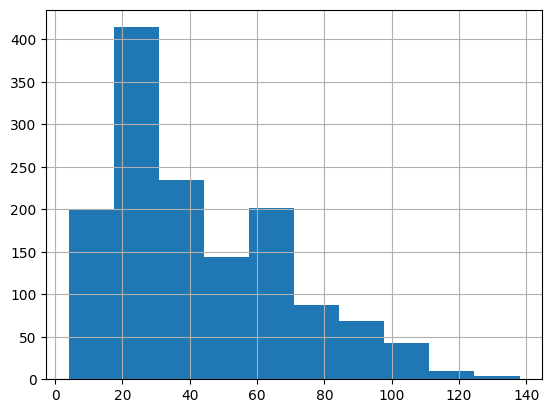

In [32]:
df['IBUs'].hist()

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

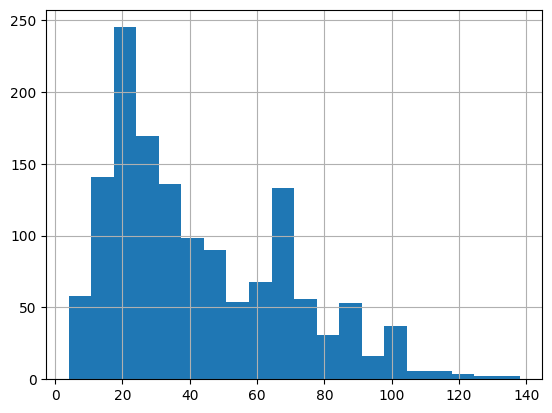

In [33]:
df['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [34]:
df[df['IBUs'] >df['IBUs'].quantile(0.75)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state_abbrev
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,KY
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,KY
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0,MA
...,...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,CA
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0,CO
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,CO
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0,CO


## List all of the beers with IBUs below the 25th percentile

In [35]:
df[df['IBUs'] <df['IBUs'].quantile(0.25)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state_abbrev
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,MN
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0,KY
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0,KY
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0,KY
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0,MA
...,...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.0,20.0,TX
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0,HI
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0,PA
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0,MN


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [36]:
df_median = df.groupby('Style')['IBUs'].median().dropna().sort_values(ascending=False)
df_median

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Herbed / Spiced Beer                  15.0
Light Lager                           12.0
Gose                                  10.0
American Adjunct Lager                 9.0
Berliner Weissbier                     8.0
Name: IBUs, Length: 90, dtype: float64

<Axes: >

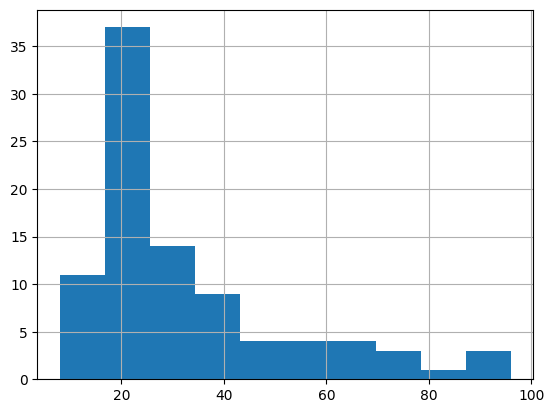

In [37]:
df_median.hist()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [38]:
df[df['IBUs'] > df['IBUs'].quantile(0.75)]['Style'].value_counts().head()
#high

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

In [39]:
df[df['IBUs'] < df['IBUs'].quantile(0.25)]['Style'].value_counts().head()
#low

Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [84]:
df2 = df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]
df2

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state_abbrev
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0,CA
42,Whitewater,Great Divide Brewing Company,"Denver, CO",American Pale Wheat Ale,12 oz.,6.1,NaN,CO
72,Citra Faced,Three Pints Brewing,"Martinsville, IN",American Pale Wheat Ale,16 oz.,5.5,64.0,IN
112,Summer Wheat,Anchor Brewing Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.5,NaN,CA
138,Waterkeeper,SweetWater Brewing Company,"Atlanta, GA",Hefeweizen,12 oz.,5.7,NaN,GA
...,...,...,...,...,...,...,...,...
2334,Haywire Hefeweizen (2010),Pyramid Breweries,"Seattle, WA",Hefeweizen,16 oz.,5.2,18.0,WA
2344,Sunshine Wheat Beer (2009),New Belgium Brewing Company,"Fort Collins, CO",American Pale Wheat Ale,12 oz.,4.8,NaN,CO
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN,NY
2383,Montana Trout Slayer Ale (2009),Big Sky Brewing Company,"Missoula, MT",American Pale Wheat Ale,12 oz.,5.0,35.0,MT


In [45]:
df2['IBUs'].mean()

18.982142857142858

In [46]:
df2['IBUs'].median()

18.0

<Axes: >

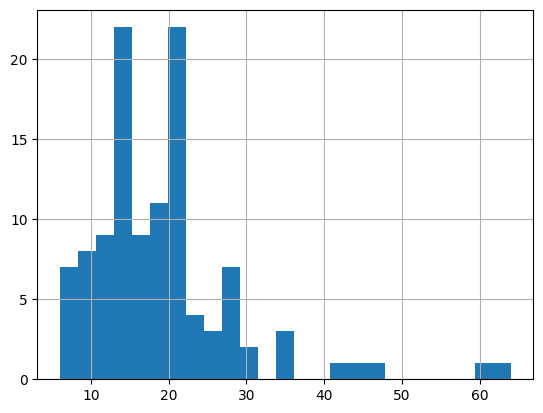

In [47]:
df2['IBUs'].hist(bins=25)

## Draw a histogram of the IBUs of those beers

<Axes: >

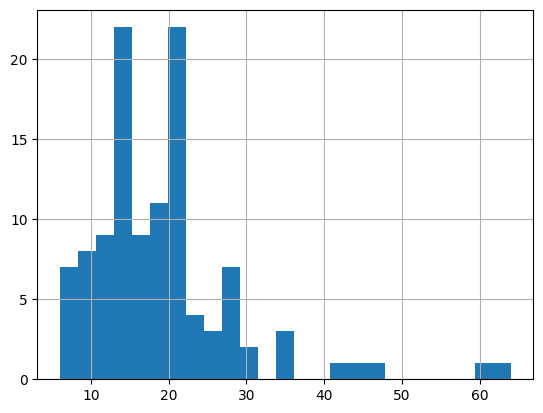

In [56]:
df2['IBUs'].hist(bins=25)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [81]:
df3 = df.loc[df['Style'].str.contains("IPA", na=False) &df['ABV']]
df3

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state_abbrev
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0,MN
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,KY
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0,CA
...,...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0,MN
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0,MN
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,CA
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,CO


In [61]:
df3['IBUs'].mean()

71.94897959183673

In [62]:
df3['IBUs'].median()

70.0

<Axes: >

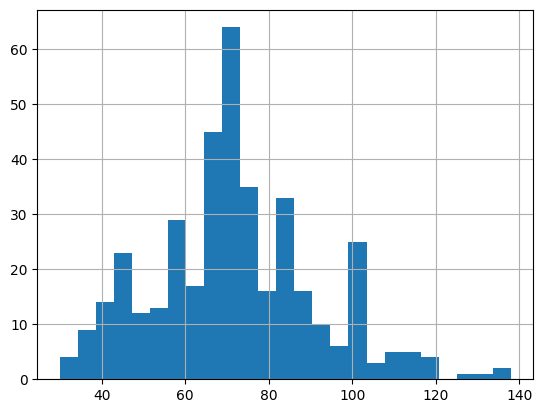

In [64]:
df3['IBUs'].hist(bins=25)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

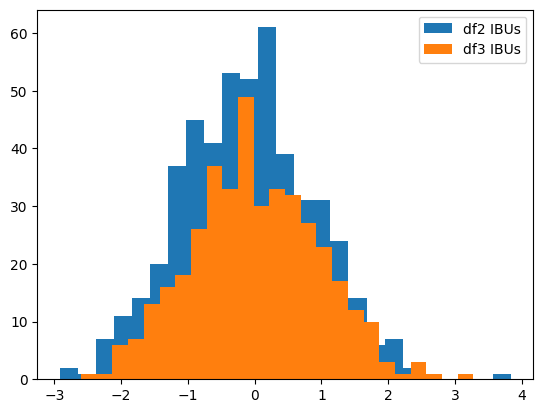

In [75]:
plt.hist(df2['IBUs'], bins=25, label='df2 IBUs')
plt.hist(df3['IBUs'], bins=25,  label='df3 IBUs')

# Adding legend
plt.legend()

# Showing the plot
plt.show()

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [90]:
#df2 has the wheaty beer info

In [91]:
df2['ABV'].mean()

5.043715846994536

In [92]:
df2['ABV'].median()

5.0

<Axes: >

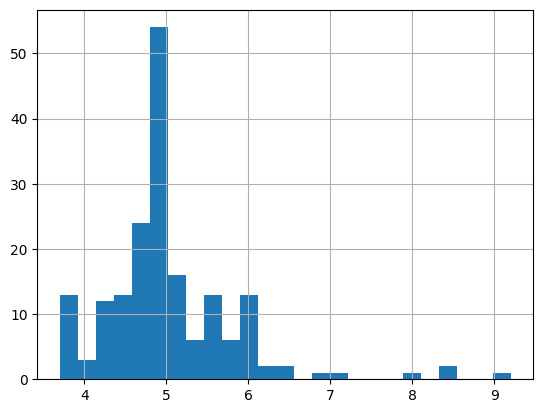

In [93]:
df2['ABV'].hist(bins=25)

In [94]:
#df3 has the IPA beer info
df3['ABV'].mean()

6.8792857142857144

In [95]:
df3['ABV'].median()

6.8

<Axes: >

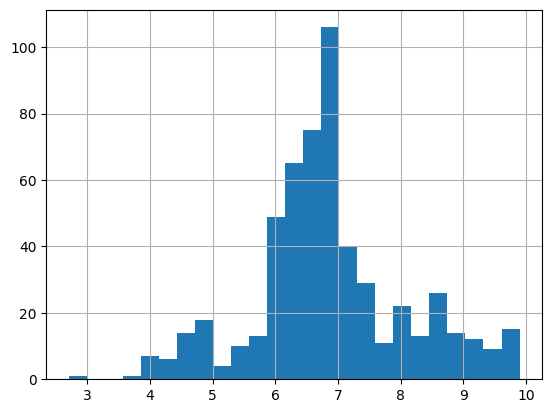

In [96]:
df3['ABV'].hist(bins=25)

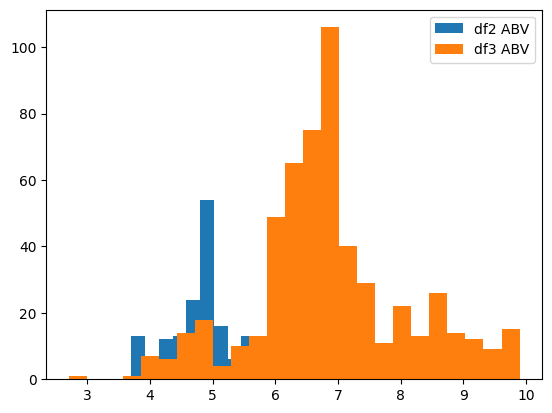

In [97]:
plt.hist(df2['ABV'], bins=25, label='df2 ABV')
plt.hist(df3['ABV'], bins=25,  label='df3 ABV')

# Adding legend
plt.legend()

# Showing the plot
plt.show()

## Good work!

In [ ]:
##Thanks!!